Adding library imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
import glob

In [2]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

Reading the initial strawberry files. Matplotlib's default color scheme BGR, so the initial reading
(as shown here) is reading the jpg color code's in reverse order. The image should be displayed as follows, but the output is incorrect.   

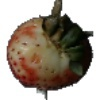



Here the image is updated to the color colorscheme using cvtColor

In [ ]:
#displaying images with updated RBG color scheme 
colorFixImg = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
plt.imshow(colorFixImg)

In [2]:
#import shutil
path = "/Users/elizadoering/projects/AI/fruits-360/Training/*/*"
files = []
[files.extend(glob.glob(path + '*.jpg'))]

images2 = [cv2.imread(file,2).astype(np.float32)/255.0 for file in files]

In [3]:
print(len(images2))
labels = []
strawCount = 0
for file in files:
    if 'Strawberry' in file or 'strawberry' in file:
        labels.append(1)
        strawCount += 1
        #print(file)
    labels.append(0)    
print(strawCount)

67692
1230


In [4]:
from skimage.util import img_as_float
new_Images = []
dim =100
for i in range(0,len(images2)):
   # m_rgb = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)
    image = np.asarray(images2[i],dtype=object)
    new_Images.append((image,labels[i]))
df = pd.DataFrame(new_Images, columns=['Image','Label'])
X = np.array(df['Image'])
Y = np.array(df['Label'])
df.head()

,Image,Label
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0


In [5]:
from sklearn.model_selection import train_test_split
from skimage.feature import hog
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
bayes_CV = cv2.ml.NormalBayesClassifier_create()
#TODO:X_train,Y_train = turn this into a mat object

In [13]:
bayes_CV.train(X_train,cv2.ml.ROW_SAMPLE,Y_train)

TypeError: Expected Ptr<cv::UMat> for argument 'samples'

In [14]:
print('X_train shape:', X_train[0].shape)
print('X_test shape:', X_test[0].shape)
print('y_train shape:', Y_train[0].shape)
print('y_test shape:', Y_test[0].shape)

X_train shape: (100, 100)
X_test shape: (100, 100)
y_train shape: ()
y_test shape: ()


In [15]:
svm_CV = cv2.ml.SVM_create()
svm_CV.setKernel(cv2.ml.SVM_LINEAR)
svm_CV.setType(cv2.ml.SVM_C_SVC)

The image label is:  0


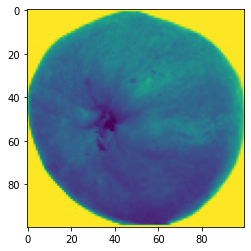

In [10]:
img = plt.imshow(X_train[2].astype(np.float32))
print('The image label is: ', Y_train[2])

The image label is:  0


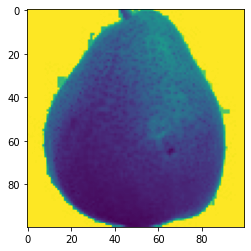

In [11]:
img = plt.imshow(X_train[2000].astype(np.float32))
print('The image label is: ', Y_train[2000])

In [12]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB
bayes_SK = GaussianNB()

In [16]:
print(type(X_train[0]))
print(type(Y_train[0]))
y_pred = bayes_SK.fit(X_train, Y_train)

<class 'numpy.ndarray'>
<class 'numpy.int64'>


ValueError: setting an array element with a sequence.